# 3D Relationship Testing

Testing relationships between 3D structures defined using contours on multiple slices.


In [1]:
# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_slice import *
from structure_set import *
from relations import *

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

### Make test structures

In [2]:
def embedded_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3 = make_box(roi_num=2, width=3, offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([cube6, cube3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [3]:
slice_table = embedded_boxes()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Contains


In [4]:
def embedded_boxes_same_start():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = shapely.Polygon(box_points(6))
    slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)
    # combine the contours
    slice_data = pd.concat([slices_1, slices_2, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [5]:
slice_table = embedded_boxes_same_start()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

Relationship: Partition


In [6]:
def overlapping_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = shapely.Polygon(box_points(6))
    slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)
    # 6 cm x 6 cm box offset right by 3 cm
    offset_box6 = shapely.Polygon(box_points(2, offset_x=3))
    # 2 cm x 2 cm box offset inf by 0.3 cm
    slices_6 = make_contour_slices(roi_num=6, shape=offset_box6,
                                   number_slices=5, offset_z=-0.3)
    # combine the contours
    slice_data = pd.concat([slices_1, slices_6, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


# Error IndexError: list index out of range in `generate_region_graph(slice_table)`

In [ ]:
slice_table = overlapping_boxes()


In [19]:
import xlwings as xw
xw.view(slice_table.map(empty_structure, invert=True))

In [14]:
slice_table[[1,6]].dropna(how='all')

ROI Num,1,6
Slice Index,,
-0.3,NaN,<structure_slice.StructureSlice object at 0x00...
-0.2,NaN,<structure_slice.StructureSlice object at 0x00...
-0.1,NaN,<structure_slice.StructureSlice object at 0x00...
0.0,<structure_slice.StructureSlice object at 0x00...,<structure_slice.StructureSlice object at 0x00...
0.1,<structure_slice.StructureSlice object at 0x00...,<structure_slice.StructureSlice object at 0x00...
0.2,<structure_slice.StructureSlice object at 0x00...,NaN
0.3,<structure_slice.StructureSlice object at 0x00...,NaN
0.4,<structure_slice.StructureSlice object at 0x00...,NaN


- Slice spacing is incorrect

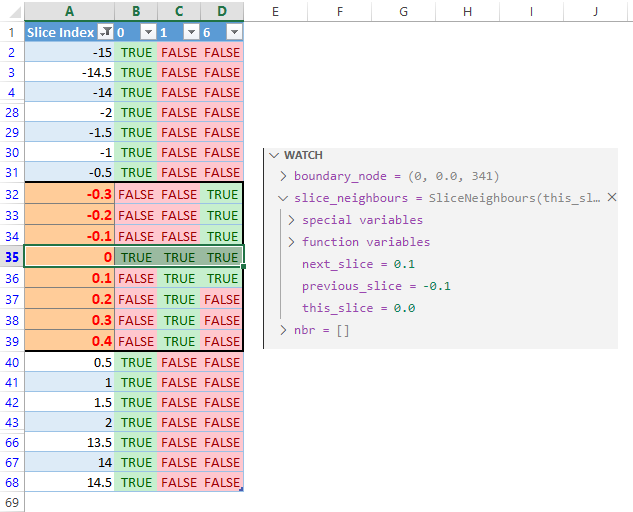

- Still need to trap error when ther are no neighbours

In [ ]:
regions = generate_region_graph(slice_table)


In [ ]:
selected_roi = [1, 6]
relation = find_relations(slice_table, regions, selected_roi)
print(relation.identify_relation())

In [8]:
slice_table = overlapping_boxes()
selected_roi = [1, 6]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [11]:
def bordering_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)
    # 6 cm x 6 cm box with 4cm x 4 cm hole
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    slices = make_slice_list(5, start=0.2)
    slices_4a = make_contour_slices(roi_num=4, shape=box6, number_slices=5,
                                    offset_z=0.2)
    slices_4b = make_contour_slices(roi_num=4, shape=box4, number_slices=5,
                                    offset_z=0.2)
    # combine the contours
    slice_data = pd.concat([slices_2, slices_4a, slices_4b, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [12]:
slice_table = bordering_boxes()
selected_roi = [4, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Confines


In [13]:
def stacked_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # 4 cm x 4 cm box
    box4 = shapely.Polygon(box_points(4))
    # Stacked Boxes
    slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5, offset_z=2)
    slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5, offset_z=-1.5)
    # combine the contours
    slice_data = pd.concat([slices_7, slices_8, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [14]:
slice_table = stacked_boxes()
selected_roi = [7, 8]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Horizontal Cylinders

![Horizontal Cylinders](./Images/FreeCAD%20Images/HorizontalCylinders.png)

In [16]:
def horizontal_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=6, length=6, height=8, offset_z=-4,
                    spacing=slice_spacing)
    cylinder2h = make_horizontal_cylinder(radius=2, length=5, roi_num=1,
                                          spacing=slice_spacing)
    cylinder1h = make_horizontal_cylinder(radius=1, length=5, roi_num=2,
                                          spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder1h, cylinder2h])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [17]:
slice_table = horizontal_cylinders()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


 #### Vertical Concentric Cylinders
 
 ![Concentric Cylinders](./Images/FreeCAD%20Images/ConcentricCylinders.png)

In [18]:
def vertical_concentric_cylinders():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    cylinder6 = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                    spacing=slice_spacing)
    cylinder4 = make_vertical_cylinder(roi_num=2, radius=4, length=10,
                                    spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder6, cylinder4])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [19]:
slice_table = vertical_concentric_cylinders()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Overlaps

In [20]:
def overlapping_cubes_left():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_left = make_box(roi_num=2, width=6, offset_x=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_left])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [21]:
slice_table = overlapping_cubes_left()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


In [22]:
def overlapping_cubes_inf():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf = make_box(roi_num=3, width=6, offset_z=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_inf])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [23]:
slice_table = overlapping_cubes_inf()
selected_roi = [1, 3]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


In [24]:
def overlapping_cubes_sup():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3_sup = make_box(roi_num=4, width=3, offset_z=-2.5,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube3_sup])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [25]:
slice_table = overlapping_cubes_sup()
selected_roi = [1, 4]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


In [26]:
def overlapping_cubes_inf_rt():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf_rt = make_box(roi_num=5, width=6, offset_z=3, offset_x=3,
                            offset_y=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_inf_rt])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [27]:
slice_table = overlapping_cubes_inf_rt()
selected_roi = [1, 5]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Overlaps


#### Concentric cylinders starting on the same slice
  
<img src="Images\Boundaries\PartitionSup3D.png" alt="PartitionSup3D" style="height:50px;">
<img src="Images\Boundaries\PartitionSup2D.png" alt="PartitionSup2D" style="height:30px;">

In [28]:
def concentric_cylinders_same_start():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders starting on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    sup_partition = make_vertical_cylinder(roi_num=2, radius=1, length=0.4,
                                           offset_z=-0.3,
                                           spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, sup_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [29]:
slice_table = concentric_cylinders_same_start()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Concentric cylinders ending on the same slice.

<img src="Images\Boundaries\PartitionInf3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\PartitionInf2D.png" alt="PartitionInf2D" style="height:30px;">

In [30]:
def concentric_cylinders_same_end():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    inf_partition = make_vertical_cylinder(roi_num=3, radius=1, length=0.4,
                                           offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, inf_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [31]:
slice_table = concentric_cylinders_same_end()
selected_roi = [1, 3]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


#### Concentric cylinders starting and ending on the same slice.

<img src="Images\Boundaries\Partition3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\Partition2D.png" alt="PartitionInf2D" style="height:30px;">

In [32]:
def concentric_cylinders_same_start_end():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Concentric cylinders starting and ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    mid_partition = make_vertical_cylinder(roi_num=4, radius=1, length=0.7,
                                           offset_z=-0.3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, mid_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [33]:
slice_table = concentric_cylinders_same_start_end()
selected_roi = [1, 4]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


### Exterior Borders
  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF cylinders in one structure with single slice gap at the SUP/INF boundary of the central cylinder.

      
![Exterior Border SUP](Images/Boundaries/ExteriorBorders2D_SUP.png)
![Exterior Border INF](Images/Boundaries/ExteriorBorders2D_INF.png)

In [34]:
def concentric_cylinders_inf_offset():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    primary_cylinder = make_vertical_cylinder(roi_num=5, radius=2, length=0.4,
                                              offset_z=-0.4,
                                              spacing=slice_spacing)
    inf_cylinder = make_vertical_cylinder(roi_num=6, radius=1, length=0.4,
                                          offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, inf_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [35]:
slice_table = concentric_cylinders_inf_offset()
selected_roi = [5, 6]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Borders


# ERROR Why are these structures Partition?

In [38]:
def overlapping_boxes():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=5, offset_z=-3,
                                spacing=slice_spacing)
    # overlapping boxes
    cube4_sup = make_box(roi_num=1, width=2, offset_z=-1, spacing=slice_spacing)
    cube4_inf = make_box(roi_num=2, width=2, offset_z= .5, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube4_sup, cube4_inf])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [39]:
slice_table = overlapping_boxes()
selected_roi = [1, 2]

relation = find_relations(slice_table, selected_roi)
print(relation.identify_relation())

Relationship: Partition


Boxes are overlapping because they have a contour on the same slice (-0.5)

In [40]:
def has_contour(slice):
    if isinstance(slice, StructureSlice):
        return 'contour'
    return ''

slice_table = overlapping_boxes()
slices = slice_table.map(has_contour)
slices.columns = ['Body', 'Sup Box', 'Inf Box']
slices

,Body,Sup Box,Inf Box
Slice Index,,,
-3.0,contour,,
-2.5,contour,,
-2.0,contour,contour,
-1.5,contour,contour,
-1.0,contour,contour,
-0.5,contour,contour,contour
0.0,contour,,contour
0.5,contour,,contour
1.0,contour,,contour


# More Tests Needed

In [ ]:
    # 6 cm x 6 cm box offset right by 3 cm
    offset_box6 = shapely.Polygon(box_points(6, offset_x=3))
    slices_3 = make_contour_slices(roi_num=3, shape=offset_box6, number_slices=5)



# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
slices_5a = make_contour_slices(roi_num=5, shape=box2a, number_slices=5)
slices_5b = make_contour_slices(roi_num=5, shape=box2b, number_slices=5)



# Stacked Boxes
slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5,
                               offset_z=2)
slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5,
                               offset_z=-1.5)


# combine the slice data
slice_data = pd.concat([slices_1, slices_2, slices_3, slices_4a, slices_4b,
                        slices_5a, slices_5b, slices_6, slices_7, slices_8])
# convert slice data into a table of slices and structures
slice_table = make_slice_table(slice_data)

In [ ]:
# 6 cm x 6 cm box
box6 = shapely.Polygon(box_points(6))
slices_1 = make_contour_slices(roi_num=1, shape=box6, number_slices=5)

# 4 cm x 4 cm box
box4 = shapely.Polygon(box_points(4))
slices_2 = make_contour_slices(roi_num=2, shape=box4, number_slices=5)

# 6 cm x 6 cm box offset right by 3 cm
offset_box6 = shapely.Polygon(box_points(6, offset_x=3))
slices_3 = make_contour_slices(roi_num=3, shape=offset_box6, number_slices=5)

# 6 cm x 6 cm box with 4cm x 4 cm hole
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
slices = make_slice_list(5, start=0.2)
slices_4a = make_contour_slices(roi_num=4, shape=box6, number_slices=5,
                                offset_z=0.2)
slices_4b = make_contour_slices(roi_num=4, shape=box4, number_slices=5,
                                offset_z=0.2)

# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
slices_5a = make_contour_slices(roi_num=5, shape=box2a, number_slices=5)
slices_5b = make_contour_slices(roi_num=5, shape=box2b, number_slices=5)

# 2 cm x 2 cm box offset inf by 0.3 cm
slices_6 = make_contour_slices(roi_num=6, shape=offset_box6, number_slices=5,
                               offset_z=-0.3)

# Stacked Boxes
slices_7 = make_contour_slices(roi_num=7, shape=box4, height=4, spacing=0.5,
                               offset_z=2)
slices_8 = make_contour_slices(roi_num=8, shape=box4, height=4, spacing=0.5,
                               offset_z=-1.5)


# combine the slice data
slice_data = pd.concat([slices_1, slices_2, slices_3, slices_4a, slices_4b,
                        slices_5a, slices_5b, slices_6, slices_7, slices_8])
# convert slice data into a table of slices and structures
slice_table = make_slice_table(slice_data)

  - Single Primary slice with circular contour.
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF Cylinders in one structure with single slice gap at level of the primary slice. 
- **Partition**
  - Concentric cylinders ending on the same slice.
  - Concentric cylinders starting on the same slice
  - Primary: Central Cylinder
    - Single Secondary slice with circular contour on the SUP/INF slice of the Primary cylinder.
  - Single Primary slice with circular contour
    - Secondary: one of:
      - SUP Cylinder ending on the same slice.
      - INF Cylinder ending on the same slice.
- **CONTAINS**
  - Concentric cylinders with interior cylinder ending inside the exterior cylinder by one slice
**OVERLAPS**
  - Concentric cylinders with interior cylinder ending outside the exterior cylinder by one slice
  - Concentric cylinders with interior cylinder consisting of single slice ending inside the exterior cylinder by one slice


  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF cylinders in one structure with single slice gap at the SUP/INF boundary of the central cylinder.
  - Single Primary slice with circular contour.
    - Secondary: one of:
      - SUP Cylinder
      - INF Cylinder
      - Combined SUP & INF Cylinders in one structure with single slice gap at level of the primary slice. 
